In [2]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import utils


In [3]:
def to_image(fft):
    return np.log(np.sqrt(fft.real ** 2 + fft.imag ** 2) + 1)


counter = 1


def convolve_im(im: np.array,
                kernel: np.array,
                verbose=True):
    """ Convolves the image (im) with the spatial kernel (kernel),
        and returns the resulting image.

        "verbose" can be used for turning on/off visualization
        convolution

        Note: kernel can be of different shape than im.

    Args:
        im: np.array of shape [H, W]
        kernel: np.array of shape [K, K] 
        verbose: bool
    Returns:
        im: np.array of shape [H, W]
    """
    # START YOUR CODE HERE ### (You can change anything inside this block)
    kernel_padded = np.pad(
        kernel, [(0, im.shape[0] - kernel.shape[i]) for i in range(2)])
    fft_kernel = np.fft.fft2(kernel_padded)
    fft_im = np.fft.fft2(im)
    filtered = fft_im * fft_kernel

    conv_result = np.fft.ifft2(filtered).real
    if verbose:
        shift_fft_im = np.fft.fftshift(fft_im)
        shift_fft_kernel = np.fft.fftshift(fft_kernel)
        shift_filtered = np.fft.fftshift(filtered)

        # Use plt.subplot to place two or more images beside eachother
        plt.figure(figsize=(20, 4))
        # plt.subplot(num_rows, num_cols, position (1-indexed))
        plt.subplot(1, 5, 1)
        plt.imshow(im, cmap="gray")
        plt.subplot(1, 5, 2)
        # Visualize FFT
        plt.imshow(to_image(shift_fft_im), cmap="gray")
        plt.subplot(1, 5, 3)
        # Visualize FFT kernel
        plt.imshow(to_image(shift_fft_kernel), cmap="gray")
        plt.subplot(1, 5, 4)
        # Visualize filtered FFT image
        plt.imshow(to_image(shift_filtered), cmap="gray")
        plt.subplot(1, 5, 5)
        # Visualize filtered spatial image
        plt.imshow(conv_result, cmap="gray")
        global counter
        plt.savefig(utils.image_output_dir.joinpath(f"task4b_{counter}.png"))
        counter += 1

    ### END YOUR CODE HERE ###
    return conv_result


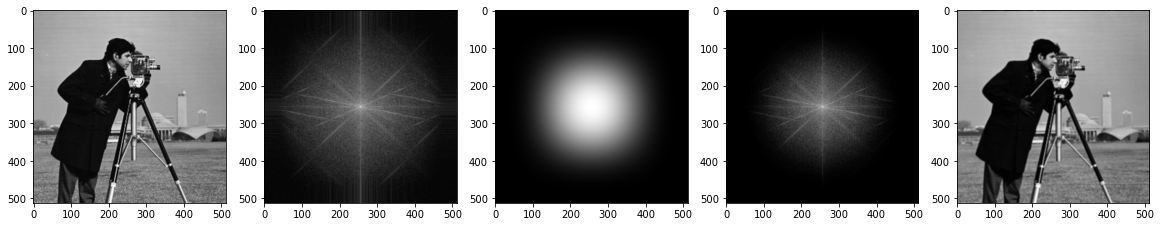

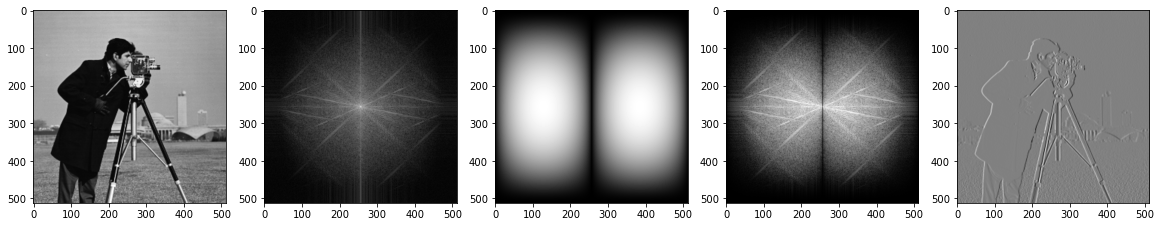

Saving image to: image_processed\camera_gaussian.png
Saving image to: image_processed\camera_sobelx.png


c:\Users\amath\code\python\tdt4195-ip\assignment 2\utils.py:84: UserWarning: Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)
  "Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)")


In [4]:
if __name__ == "__main__":
    verbose = True  # change if you want

    # Changing this code should not be needed
    im = skimage.data.camera()
    im = utils.uint8_to_float(im)

    # DO NOT CHANGE
    gaussian_kernel = np.array([
        [1, 4, 6, 4, 1],
        [4, 16, 24, 16, 4],
        [6, 24, 36, 24, 6],
        [4, 16, 24, 16, 4],
        [1, 4, 6, 4, 1],
    ]) / 256
    image_gaussian = convolve_im(im, gaussian_kernel, verbose)

    # DO NOT CHANGE
    sobel_horizontal = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
    image_sobelx = convolve_im(im, sobel_horizontal, verbose)

    if verbose:
        plt.show()

    utils.save_im("camera_gaussian.png", image_gaussian)
    utils.save_im("camera_sobelx.png", image_sobelx)
